# Introduction

This project involves analyzing user interaction data to determine whether a proposed change leads to increased user engagement. The dataset includes user IDs, their group assignment (control or treatment), and whether or not they clicked on a given element. By comparing the performance of the control and treatment groups, we aim to assess whether the variation improves user behavior as intended.

## Problem Statement

The objective of this project is to evaluate the effectiveness of a proposed change on user click behavior.  
Specifically, we aim to answer the question:   
**Does the treatment group exhibit a significantly higher click-through rate (CTR) compared to the control group?**

In [16]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("webpage analytics.csv")
df.head()

,user_id,group,views,clicks
0,1,control,3.0,0.0
1,2,control,1.0,0.0
2,3,control,3.0,1.0
3,4,control,5.0,0.0
4,5,control,2.0,0.0


In [3]:
df.shape

(80000, 4)

In [4]:
df['group'].value_counts()  
          

group
control    40000
test       40000
Name: count, dtype: int64

In [5]:
df.isnull().sum()

user_id    0
group      0
views      0
clicks     0
dtype: int64

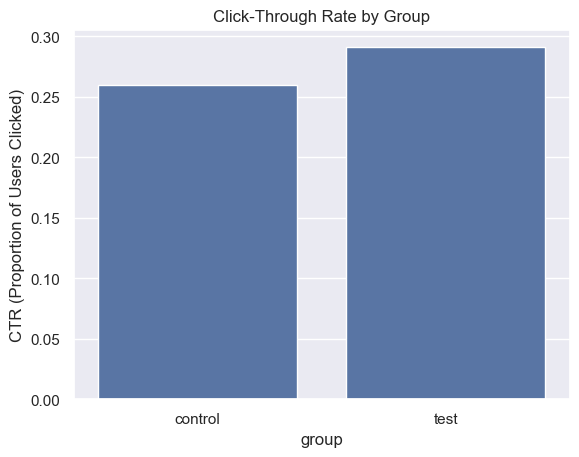

In [17]:
df['clicked'] = df['clicks'] > 0

click_rates = df.groupby('group')['clicked'].mean().reset_index()
sns.set()
sns.barplot(data=click_rates, x='group', y='clicked')
plt.title("Click-Through Rate by Group")
plt.ylabel("CTR (Proportion of Users Clicked)")
plt.show()


In [6]:
df = df[df['views'] > 0]

df = df.drop(["views"], axis=1) # we don't need column "views"

In [7]:
df.head()

,user_id,group,clicks
0,1,control,0.0
1,2,control,0.0
2,3,control,1.0
3,4,control,0.0
4,5,control,0.0


In [8]:
df.tail()

,user_id,group,clicks
79995,79996,test,0.0
79996,79997,test,0.0
79997,79998,test,1.0
79998,79999,test,0.0
79999,80000,test,0.0


In [9]:
df.shape

(80000, 3)

$$H_0: p_{con} = p_{test}$$  
$$H_a: p_{con} \neq p_{test}$$

## estimating z critical values

In [19]:
alpha = 0.05
z_crit = np.array([-stats.norm.ppf(1 - alpha/2), stats.norm.ppf(1 - alpha/2)])

In [22]:
print(f"critical z-values for 2 sided z-test: {np.round(z_crit,2)}")

critical z-values for 2 sided z-test: [-1.96  1.96]


## z-statistic and p-value calculations

In [10]:
x_con = df.groupby("group")["clicks"].sum().loc['control'] # sum of clicks for the control group 
x_test = df.groupby("group")["clicks"].sum().loc["test"] # sum of clicks for the test group

In [11]:
# count of users for every group
n_con = df.groupby("group").size().loc["control"]
n_test = df.groupby("group").size().loc["test"]

In [12]:
# estimating click proportion for every group
p_hat_con = x_con/n_con
p_hat_test = x_test/n_test

# estimating pooled ckick proportion 
p_pooled = (x_con+x_test)/(n_con+n_test)

print(f"Click proportion for the control group: {round(p_hat_con, 3)}")
print(f"Click proportion for the test group: {round(p_hat_test, 3)}")
print(f"Pooled click proportion: {round(p_pooled, 3)}")

Click proportion for the control group: 0.346
Click proportion for the test group: 0.401
Pooled click proportion: 0.373


In [13]:
# calculating pooled variance and standard error
pooled_variance = p_pooled*(1-p_pooled)*(1/n_con + 1/n_test)
SE = np.sqrt(pooled_variance)
print(f"Standard error: {round(SE,3)}")

Standard error: 0.003


In [14]:
# calculating z-statistic
z_stat = (p_hat_con - p_hat_test)/SE
print(f"z-statistic: {z_stat}")

z-statistic: -16.20427245930439


In [15]:
# calculating p-value
p_val = 2 * stats.norm.sf(abs(z_stat))
print(f"the p-value: {p_val}")

the p-value: 4.704212751163016e-59


This p-value is **extremely small**, far below any common significance level (e.g., 0.05, 0.01, or even 0.001).  
Since the p-value is virtually zero, we **reject the null hypothesis**. This provides **strong statistical evidence** that the test group has a significantly different click-through rate compared to the control group. The change introduced in the treatment condition appears to have a **real impact on user behavior**.